# Funções

Se declara com `def nome_funcao (parametro, parametro):` 

- Pode ser declarada pedindo parâmetro: `def nome_funcao ():`
- Pode com parâmetro padrão: `def nome_funcao (nome="Antônio"):`

A função em Python pode retornar mais de um valor:

In [3]:
def calcular_total(numeros):
    return sum(numeros) # retorna apenas um valor`

In [4]:
def antecessor_e_sucessor(numero):
   antecessor = numero - 1        
   sucessor = numero + 1          
   return antecessor, sucessor    # retorna dois valores em uma **tupla**

Se uma função não tiver return explícito, automaticamente retornará “none”
---
### Chamando uma função

In [5]:
def salvar_carro(marca, modelo, ano, placa):
    # salva carro no banco de dados...
    print(f"Carro inserido com sucesso! {marca}/{modelo}/{ano}/{placa}")

salvar_carro("Fiat", "Palio", 1999, "ABC-1234") # pode haver problemas se trocar os parâmetros de posição na declaração
salvar_carro(marca="Fiat", modelo="Palio", ano=1999, placa="ABC-1234") # aqui todos os parâmetros irão para a posição certa
salvar_carro(**{"marca": "Fiat", "modelo": "Palio", "ano": 1999, "placa": "ABC-1234"}) # Passando um dicionário como argumento 

Carro inserido com sucesso! Fiat/Palio/1999/ABC-1234
Carro inserido com sucesso! Fiat/Palio/1999/ABC-1234
Carro inserido com sucesso! Fiat/Palio/1999/ABC-1234


## Args e kwargs

Pode-se passar parâmetros obrigatórios com args e kwargs. Quando esses são definidos (*args e **kwargs), o método recebe os valores como tupla e dicionário, respectivamente.

In [6]:
def exibir_poema(data_extenso, *args, **kwargs):
    texto = "\n".join(args)
    meta_dados = "\n".join([f"{chave.title()}: {valor}" for chave, valor in kwargs.items()])
    mensagem = f"{data_extenso}\n\n{texto}\n\n{meta_dados}"
    print(mensagem)


exibir_poema(
		"28 de Agosto",
    "Zen of Python",
    "Beautiful is better than ugly.",
    "Explicit is better than implicit.",
    "Simple is better than complex.",
    "Complex is better than complicated.",
    "Flat is better than nested.",
    "Sparse is better than dense.",
    "Readability counts.",
    "Special cases aren't special enough to break the rules.",
    "Although practicality beats purity.",
    "Errors should never pass silently.",
    "Unless explicitly silenced.",
    "In the face of ambiguity, refuse the temptation to guess.",
    "There should be one-- and preferably only one --obvious way to do it.",
    "Although that way may not be obvious at first unless you're Dutch.",
    "Now is better than never.",
    "Although never is often better than *right* now.",
    "If the implementation is hard to explain, it's a bad idea.",
    "If the implementation is easy to explain, it may be a good idea.",
    "Namespaces are one honking great idea -- let's do more of those!",
    autor="Tim Peters",
    ano=1999,
)

28 de Agosto

Zen of Python
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!

Autor: Tim Peters
Ano: 1999


É possível notar no código acima que o primeiro parâmetro sempre será tido como “data_extenso” e todos os parâmetros a seguir entrarão como “*args”, a seguir os parâmetros inseridos como dicionário serão “**kwargs”.
---
## Parâmetros especiais

Por padrão, argumentos podem ser passados para uma função Python tanto por posição quanto explicitamente pelo nome. Para uma melhor legibilidade e desempenho, faz sentido restringir a maneira pela qual argumentos possam ser passados. Assim, um desenvolvedor precisa apenas olhar para a definição da função para determinar se os itens são passados por posição, por posição e nome ou apenas por nome.  
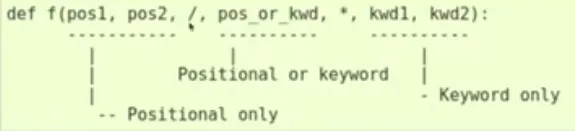

- Tudo que vem antes do **/** deve ser declarado apenas por posição, o que está entre o **/** e o _*_ pode ser declarado tanto por posição, quanto por nome, e tudo que for depois do _*_ pode ser declarado apenas por nome

In [7]:
# Obrigando a ter alguns declarados por posição e outros por nome
def criar_carro(modelo, ano, placa, /, *, marca, motor, combustivel):
    print(modelo, ano, placa, marca, motor, combustivel)


# criar_carro("Palio", 1999, "ABC-1234", marca="Fiat", motor="1.0", combustivel="Gasolina")
criar_carro(modelo="Palio", ano=1999, placa="ABC-1234", marca="Fiat", motor="1.0", combustivel="Gasolina")  # inválido

# Obrigando a declarar parâmetro apenas por nome
def criar_carro(*,modelo, ano, placa, marca, motor, combustivel):
    print(modelo, ano, placa, marca, motor, combustivel)


# criar_carro("Palio", 1999, "ABC-1234", marca="Fiat", motor="1.0", combustivel="Gasolina") inválido
criar_carro(modelo="Palio", ano=1999, placa="ABC-1234", marca="Fiat", motor="1.0", combustivel="Gasolina")  # válido

TypeError: criar_carro() got some positional-only arguments passed as keyword arguments: 'modelo, ano, placa'

## Objetos de primeira classe

Em Python, tudo é objeto. Dessa forma, as funções **também são objetos**, o que as tornam objetos de primeira classe. Com isso, podemos **atribuir funções a variáveis, passá-las como parâmetros para funções, usá-las como valores em estruturas de dados** (listas, tuplas, dicionários, etc) e usar como valor de retorno para uma função (closures).

In [ ]:
def somar(a, b):
    return a + b

def exibir_resultado(a, b, funcao):
    resultado = funcao(a, b)
    print(f"O resultado da operação {a} + {b} = {resultado}")

exibir_resultado(10, 10, somar)  # O resultado da operação 10 + 10 = 20

## Escopo local e escopo global

Python trabalha com escopo local e global. Dentro do bloco da função, o escopo é local. Portanto, alterações ali feitas em objetos imutáveis serão perdidas quando o método terminar de ser executado. Para usar objetos globais, utilizamos a palavra-chave **global**, que informa ao interpretador que a variável que está sendo manipulada no escopo local é global. **Essa NÃO é uma boa prática.**

In [ ]:
salario = 2000

def salario_bonus(bonus):
    global salario
    salario += bonus
    return salario

salario_bonus(500)  # 2500